In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
plt.style.use('seaborn')
X = np.load('XbrainRegions.npy')
y = np.load('YbrainRegions.npy')

print(f'X shape: {X.shape} y shape: {y.shape}')

X shape: (678, 360) y shape: (678,)


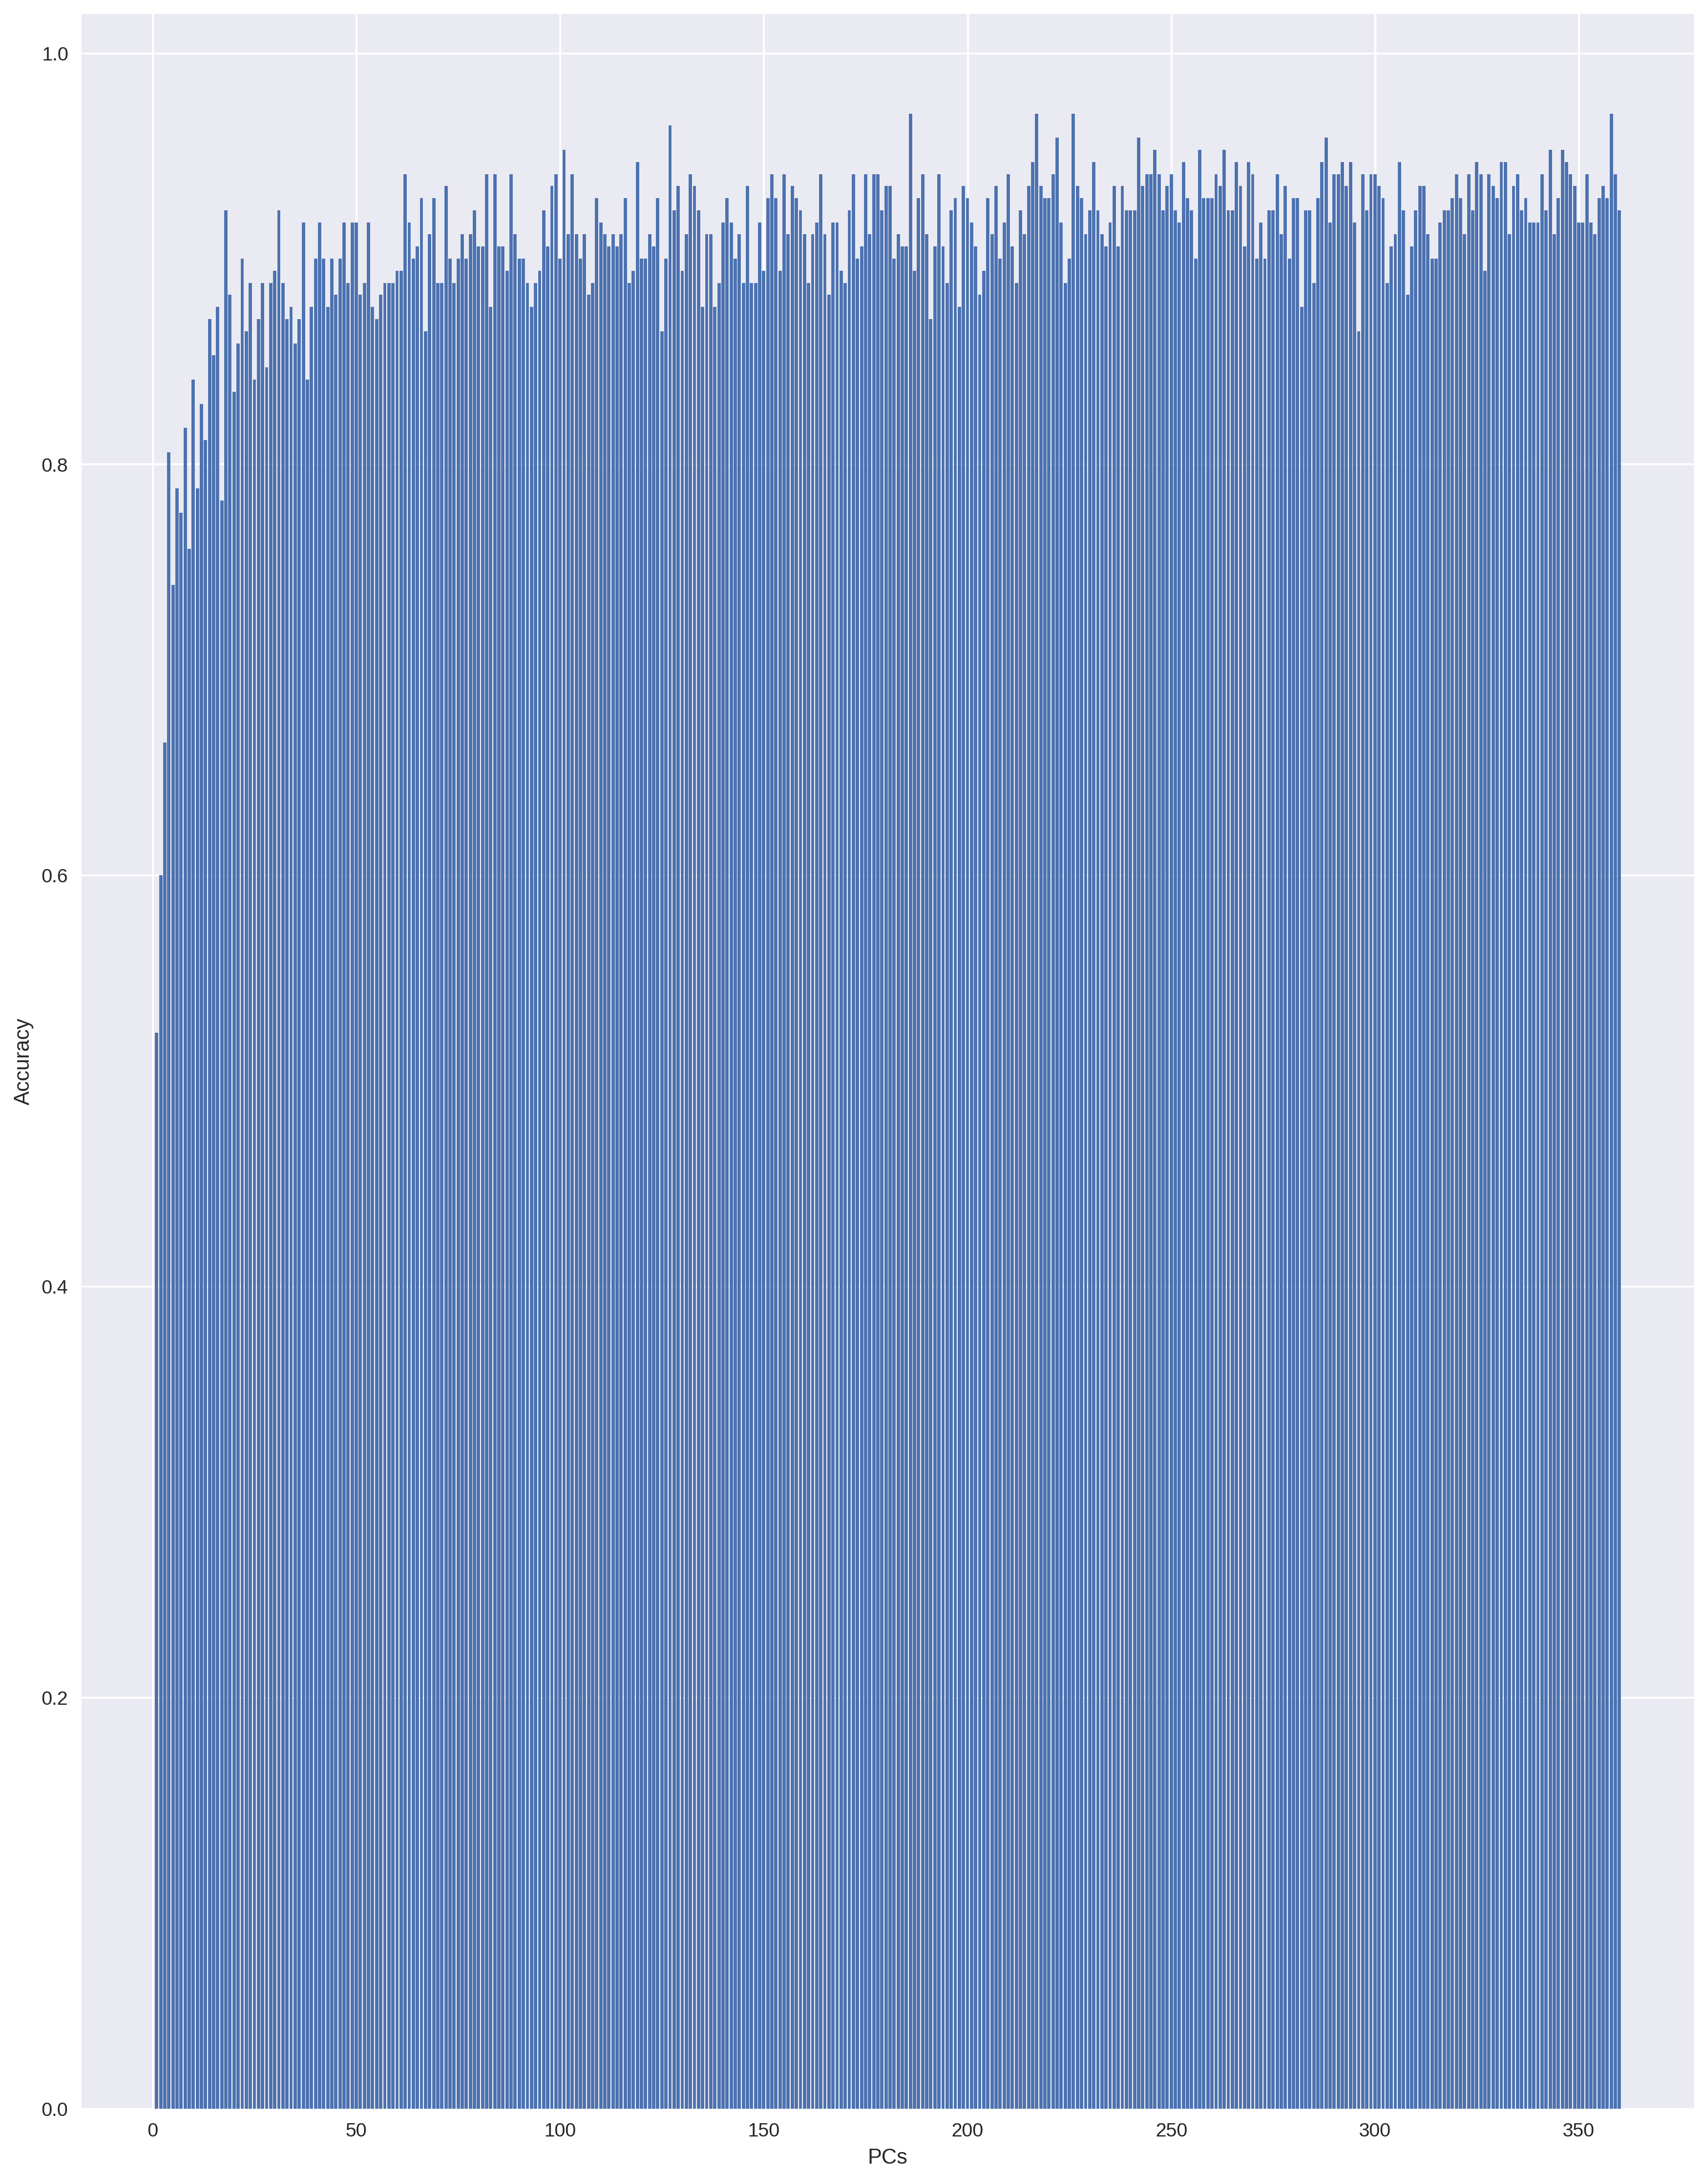

In [25]:
def makePCC(X , y):
    accHist = []
    pcs = [i+1 for i in range(X.shape[1])]
    
    for i in range(X.shape[1]):
        k = i+1
        scaler = StandardScaler()
        scaler.fit(X) 
        X_scaled = scaler.transform(X)

        pca = PCA(n_components=k)
        pca.fit(X_scaled) 
        X_pca = pca.transform(X_scaled)
        X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25)
        logisticRegr = LogisticRegression()
        logisticRegr.fit(X_train, y_train)
        score = logisticRegr.score(X_test, y_test)
        accHist.append(score)
    figure(figsize=(15,20), dpi=250)
    plt.bar(pcs , accHist)
    plt.xlabel('PCs')
    plt.ylabel('Accuracy')
    plt.show()
        
        
        
makePCC(X,y)

        
        

        
        
        